In [43]:
import os
import glob
import pandas as pd
from tqdm import tqdm
import seaborn as sns
%matplotlib inline

In [82]:
csvs = glob.glob(os.path.join('..', 'multisearch*', '*.csv'))

cols =[
        "human_gene",
        "c_elegans_gene",
        "similarity",
        "prob_overlap",
        "weight",
        "alphabet",
        "ksize",
        "scaled",
        "md5",
        "filename",
        "name",
        "query_filename",
        "query_name",
        "query_md5",
        "ani",
    ]

dfs = []
for csv in tqdm(csvs):
    dirname = os.path.dirname(csv)
    split = dirname.split('-')
    alphabet = split[1]
    ksize = int(split[2].lstrip('k'))
    scaled = int(split[3].lstrip('scaled'))
    try:
        df = pd.read_csv(csv)
    except pd.errors.EmptyDataError:
        continue
    df['alphabet'] = alphabet
    df['ksize'] = ksize
    df['scaled'] = scaled
    
    # Get simplified gene name
    df['human_gene'] = df.name.str.extract('gene_name=([\w\-]+);')
    df['c_elegans_gene'] = df.query_name.str.extract('gene_symbol:([\w\-]+)')
    
    # Reorder columns
    df = df[cols]
    dfs.append(df)
multisearch = pd.concat(dfs, ignore_index=True)

multisearch

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20713/20713 [00:37<00:00, 556.90it/s]


,human_gene,c_elegans_gene,similarity,prob_overlap,weight,alphabet,ksize,scaled,md5,filename,name,query_filename,query_name,query_md5,ani
0,BCL2L1,ced-2,0.090996,0.005000,18.199297,hp,11,5,cfc5b6ef68bc2ce06e4b1400a50ca543,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000450273.2 gene_id=ENSG00000171552.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,Y41D4B.13b.1 pep chromosome:WBcel235:IV:160017...,5f25778a,NaN
1,BCL2L11,ced-2,0.082074,0.009091,9.028152,hp,11,5,6ca30e6c7e2b4e64dabf3d778a79d5a2,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000357757.6 gene_id=ENSG00000153094.24;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,Y41D4B.13b.1 pep chromosome:WBcel235:IV:160017...,5f25778a,NaN
2,BCL2L1,ced-2,0.077139,0.005769,13.370768,hp,11,5,7500dbc31069c1cebd74a20b0ee9369d,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000376055.9 gene_id=ENSG00000171552.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,Y41D4B.13b.1 pep chromosome:WBcel235:IV:160017...,5f25778a,NaN
3,BCL2L11,ced-2,0.072708,0.007143,10.179052,hp,11,5,057dff08b6ef4ffc55843e033cf59cd8,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000620862.4 gene_id=ENSG00000153094.24;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,Y41D4B.13b.1 pep chromosome:WBcel235:IV:160017...,5f25778a,NaN
4,BCL2L11,ced-2,0.067993,0.006250,10.878894,hp,11,5,d15690d51cdfbef42500016c42c117d1,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000337565.9 gene_id=ENSG00000153094.24;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,Y41D4B.13b.1 pep chromosome:WBcel235:IV:160017...,5f25778a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238939,BCL2A1,fipr-5,0.012476,0.000362,34.422240,dayhoff,5,2,12977c30c29711c8547a2b023fa67dec,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000677151.1 gene_id=ENSG00000140379.9;tr...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,C12D8.18.1 pep chromosome:WBcel235:V:10220981:...,138d202e,NaN
238940,BCL2L11,fipr-5,0.009282,0.000424,21.869414,dayhoff,5,2,f8d1b457d38f7ac3812ffd9f324a64f7,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000615946.4 gene_id=ENSG00000153094.24;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,C12D8.18.1 pep chromosome:WBcel235:V:10220981:...,138d202e,NaN
238941,BCL2L11,fipr-5,0.007832,0.000329,23.792706,dayhoff,5,2,41ce943867107313a79a551ad2550059,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000620862.4 gene_id=ENSG00000153094.24;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,C12D8.18.1 pep chromosome:WBcel235:V:10220981:...,138d202e,NaN
238942,BCL2L11,fipr-5,0.007242,0.000273,26.491078,dayhoff,5,2,b960338dd85b843493d4aedf01d5ea64,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000308659.12 gene_id=ENSG00000153094.24;...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,C12D8.18.1 pep chromosome:WBcel235:V:10220981:...,138d202e,NaN


In [84]:
multisearch.dtypes

human_gene         object
c_elegans_gene     object
similarity        float64
prob_overlap      float64
weight            float64
alphabet           object
ksize               int64
scaled              int64
md5                object
filename           object
name               object
query_filename     object
query_name         object
query_md5          object
ani               float64
dtype: object

In [102]:
multisearch['query_md5'] = multisearch['query_md5'].astype(str)

In [103]:
multisearch.to_parquet('multisearch.parquet')

In [104]:
ls -lha

total 359568
drwxr-xr-x   7 olgabot  staff   224B Dec  4 17:58 ./
drwxr-xr-x  18 olgabot  staff   576B Dec  4 08:02 ../
drwxr-xr-x   3 olgabot  staff    96B Dec  3 22:05 .ipynb_checkpoints/
-rw-r--r--   1 olgabot  staff   225K Dec  4 17:58 Untitled.ipynb
-rw-r--r--   1 olgabot  staff   148M Dec  3 22:30 multisearch.csv
-rw-r--r--   1 olgabot  staff    20M Dec  3 22:30 multisearch.csv.gz
-rw-r--r--   1 olgabot  staff   6.2M Dec  4 17:57 multisearch.parquet


In [61]:
multisearch.to_csv('multisearch.csv.gz')

In [69]:
ced9 = multisearch.query('c_elegans_gene == "ced-9"')
ced9['bcl2'] = ced9['human_gene'] == "BCL2"
ced9['bcl2_like'] = ced9['human_gene'].str.startswith("BCL2")
ced9

/var/folders/7z/r1593ybs1sj2ks5zzl9vy8840000gn/T/ipykernel_71151/3244732988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ced9['bcl2'] = ced9['human_gene'] == "BCL2"
/var/folders/7z/r1593ybs1sj2ks5zzl9vy8840000gn/T/ipykernel_71151/3244732988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ced9['bcl2_like'] = ced9['human_gene'].str.startswith("BCL2")


,human_gene,c_elegans_gene,similarity,prob_overlap,weight,alphabet,ksize,scaled,md5,filename,name,query_filename,query_name,query_md5,ani,bcl2,bcl2_like
140,BCL2L1,ced-9,0.123565,0.004348,28.419971,hp,11,5,cfc5b6ef68bc2ce06e4b1400a50ca543,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000450273.2 gene_id=ENSG00000171552.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,d5b4d9ec,NaN,False,True
141,BCL2L1,ced-9,0.112690,0.004459,25.270748,hp,11,5,bef09d909e58cf73f63ef02bd57d0140,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000376062.6 gene_id=ENSG00000171552.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,d5b4d9ec,NaN,False,True
142,BCL2L13,ced-9,0.104167,0.003106,33.541764,hp,11,5,0f606b742d0335376759c0769f9b220d,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000611738.4 gene_id=ENSG00000099968.18;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,d5b4d9ec,NaN,False,True
143,BCL2L13,ced-9,0.103078,0.002952,34.915297,hp,11,5,41a2839a3509c2924c6364e6c0703638,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000618481.4 gene_id=ENSG00000099968.18;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,d5b4d9ec,NaN,False,True
144,BCL2L14,ced-9,0.099246,0.003373,29.420962,hp,11,5,13bf7da4ea6612eb89ed3181e1f2ee7f,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000586576.5 gene_id=ENSG00000121380.12;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,d5b4d9ec,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237965,BCL2L15,ced-9,0.050711,0.000768,66.025671,dayhoff,5,2,0495ae8c9abbaa0a24f4960b90b656b5,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000393316.8 gene_id=ENSG00000188761.13;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,09ffa2d7,NaN,False,True
237966,BCL2L15,ced-9,0.045848,0.000947,48.415028,dayhoff,5,2,7c09f6f350e5b3eef71b190ffa5d9ab2,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000471267.1 gene_id=ENSG00000188761.13;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,09ffa2d7,NaN,False,True
237967,BCL2L2,ced-9,0.039213,0.000669,58.577056,dayhoff,5,2,ce395226b2db40f0c63cb9a1275c0bea,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000557236.6 gene_id=ENSG00000129473.11;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,09ffa2d7,NaN,False,True
237968,ACTB,ced-9,0.029530,0.000847,34.864610,dayhoff,5,2,774db102c4e0d6eb6f39366f31076f85,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000676319.1 gene_id=ENSG00000075624.17;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,09ffa2d7,NaN,False,False


### Show top hit

In [87]:
ced9_tophits = ced9.groupby(['alphabet', 'ksize', 'scaled']).apply(lambda x: x.nlargest(1, 'weight'))

In [88]:
ced9_tophits.bcl2.sum()

0

In [89]:
ced9_tophits.bcl2_like.sum()

27

In [90]:
ced9_principal = ced9.loc[ced9.name.str.contains('appris_principal')]

In [91]:
ced9_principal_tophits = ced9_principal.groupby(['alphabet', 'ksize', 'scaled']).apply(lambda x: x.nlargest(1, 'weight'))
ced9_principal_tophits

human_gene c_elegans_gene  similarity  \
alphabet ksize scaled                                                
dayhoff  5     1      115524      LACTB          ced-9    0.136195   
               2      237908      LACTB          ced-9    0.155392   
               5      229358      LACTB          ced-9    0.184190   
               10     119232    BCL2L13          ced-9    0.089063   
         6     1      27267       LACTB          ced-9    0.046109   
...                                 ...            ...         ...   
hp       17    10     226447     BCL2L1          ced-9    0.025997   
         18    1      143550      LACTB          ced-9    0.001705   
               2      19937        BCL2          ced-9    0.010282   
         19    1      160333       BCL2          ced-9    0.002646   
               2      29301        BCL2          ced-9    0.004840   

                              prob_overlap      weight alphabet  ksize  \
alphabet ksize scaled                                                    
dayhoff  5     1      115524      0.000707  192.558710  dayhoff      5   
               2      237908      0.001507  103.112015  dayhoff      5   
               5      229358      0.004717   39.048260  dayhoff      5   
               10     119232      0.004487   19.848241  dayhoff      5   
         6     1      27267       0.000201  229.086460  dayhoff      6   
...                                    ...         ...      ...    ...   
hp       17    10     226447      0.001667   15.598271       hp     17   
         18    1      143550      0.000007  237.682087       hp     18   
               2      19937       0.000130   78.841532       hp     18   
         19    1      160333      0.000017  153.189203       hp     19   
               2      29301       0.000058   83.742324       hp     19   

                              scaled                               md5  \
alphabet ksize scaled                                                    
dayhoff  5     1      115524       1  af5f6cd4a82d91b22b32285918f1ecde   
               2      237908       2  4d8b46ad710d98145c55bb09bcbe68ba   
               5      229358       5  62696f5ee88445d6f26aeb725a7cbad3   
               10     119232      10  1f8a30b8b163fd4f26228203d9ebd829   
         6     1      27267        1  5da2270ac364dfb5709604dda7f3e309   
...                              ...                               ...   
hp       17    10     226447      10  ab2727836d60d443c84b0204fcf4d60f   
         18    1      143550       1  6fa6c4e05d0493836891ca62bb1f8668   
               2      19937        2  58b0cafb610a4ff3b65a48bae751c863   
         19    1      160333       1  54aa5ce95949da5c2c00d01716a44762   
               2      29301        2  661b685d1a9474380c7536bfbfd5c886   

                                                                       filename  \
alphabet ksize scaled                                                             
dayhoff  5     1      115524  gencode.v38.basic.annotation.protein.BCL2.ACTB...   
               2      237908  gencode.v38.basic.annotation.protein.BCL2.ACTB...   
               5      229358  gencode.v38.basic.annotation.protein.BCL2.ACTB...   
               10     119232  gencode.v38.basic.annotation.protein.BCL2.ACTB...   
         6     1      27267   gencode.v38.basic.annotation.protein.BCL2.ACTB...   
...                                                                         ...   
hp       17    10     226447  gencode.v38.basic.annotation.protein.BCL2.ACTB...   
         18    1      143550  gencode.v38.basic.annotation.protein.BCL2.ACTB...   
               2      19937   gencode.v38.basic.annotation.protein.BCL2.ACTB...   
         19    1      160333  gencode.v38.basic.annotation.protein.BCL2.ACTB...   
               2      29301   gencode.v38.basic.annotation.protein.BCL2.ACTB...   

                                                                           name  \
alphabet ksize scaled        

In [92]:
ced9_principal_tophits.bcl2.sum()

3

In [93]:
ced9_principal_tophits.query('bcl2 == True')

human_gene c_elegans_gene  similarity  \
alphabet ksize scaled                                                
hp       18    2      19937        BCL2          ced-9    0.010282   
         19    1      160333       BCL2          ced-9    0.002646   
               2      29301        BCL2          ced-9    0.004840   

                              prob_overlap      weight alphabet  ksize  \
alphabet ksize scaled                                                    
hp       18    2      19937       0.000130   78.841532       hp     18   
         19    1      160333      0.000017  153.189203       hp     19   
               2      29301       0.000058   83.742324       hp     19   

                              scaled                               md5  \
alphabet ksize scaled                                                    
hp       18    2      19937        2  58b0cafb610a4ff3b65a48bae751c863   
         19    1      160333       1  54aa5ce95949da5c2c00d01716a44762   
               2      29301        2  661b685d1a9474380c7536bfbfd5c886   

                                                                       filename  \
alphabet ksize scaled                                                             
hp       18    2      19937   gencode.v38.basic.annotation.protein.BCL2.ACTB...   
         19    1      160333  gencode.v38.basic.annotation.protein.BCL2.ACTB...   
               2      29301   gencode.v38.basic.annotation.protein.BCL2.ACTB...   

                                                                           name  \
alphabet ksize scaled                                                             
hp       18    2      19937   ENST00000333681.5 gene_id=ENSG00000171791.14;t...   
         19    1      160333  ENST00000333681.5 gene_id=ENSG00000171791.14;t...   
               2      29301   ENST00000333681.5 gene_id=ENSG00000171791.14;t...   

                                                          query_filename  \
alphabet ksize scaled                                                      
hp       18    2      19937   Caenorhabditis_elegans.WBcel235.pep.ced.fa   
         19    1      160333  Caenorhabditis_elegans.WBcel235.pep.ced.fa   
               2      29301   Caenorhabditis_elegans.WBcel235.pep.ced.fa   

                                                                     query_name  \
alphabet ksize scaled                                                             
hp       18    2      19937   T07C4.8.1 pep chromosome:WBcel235:III:10335172...   
         19    1      160333  T07C4.8.1 pep chromosome:WBcel235:III:10335172...   
               2      29301   T07C4.8.1 pep chromosome:WBcel235:III:10335172...   

                             query_md5  ani  bcl2  bcl2_like  
alphabet ksize scaled                                         
hp       18    2      19937   61bca4a4  NaN  True       True  
         19    1      160333  489870b8  NaN  True       True  
               2      29301   11437b0a  NaN  True       True

In [94]:
ced9_principal_tophits.bcl2_like.sum()

23

In [95]:
ced9.query('human_gene == "BCL2"')

,human_gene,c_elegans_gene,similarity,prob_overlap,weight,alphabet,ksize,scaled,md5,filename,name,query_filename,query_name,query_md5,ani,bcl2,bcl2_like
180,BCL2,ced-9,0.048779,0.002038,23.934114,hp,11,5,8523c887088ca20a2b3d96635ac13edc,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000589955.2 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,d5b4d9ec,NaN,True,True
185,BCL2,ced-9,0.043084,0.001672,25.764492,hp,11,5,54f6aef3c06ed2c688d463cb5447f7bc,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000333681.5 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,d5b4d9ec,NaN,True,True
10483,BCL2,ced-9,0.127206,0.002056,61.874359,hp,11,2,64856e21b4224729300f4edf61837f92,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000589955.2 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,ebb98d6c,NaN,True,True
10485,BCL2,ced-9,0.120881,0.001833,65.937884,hp,11,2,35c63c6a936924a3f5f12268a47140b3,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000333681.5 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,ebb98d6c,NaN,True,True
10529,BCL2,ced-9,0.039893,0.001435,27.805267,hp,11,2,5a041bea760e4a382df4cfacb54df0a8,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000590515.1 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,ebb98d6c,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229409,BCL2,ced-9,0.046732,0.003069,15.225991,dayhoff,5,5,a109adfb45d049c5196f3587ad29a6af,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000589955.2 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,31f1c5be,NaN,True,True
237945,BCL2,ced-9,0.077249,0.002165,35.689221,dayhoff,5,2,9b6cc89f1fd206bdd504042223efa2cc,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000678301.1 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,09ffa2d7,NaN,True,True
237954,BCL2,ced-9,0.061883,0.001855,33.354846,dayhoff,5,2,b1882e529da443f1a4839e2f438095b4,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000590515.1 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,09ffa2d7,NaN,True,True
237957,BCL2,ced-9,0.059521,0.001211,49.130902,dayhoff,5,2,529102ff6e922a414333e11a4df2f64c,gencode.v38.basic.annotation.protein.BCL2.ACTB...,ENST00000333681.5 gene_id=ENSG00000171791.14;t...,Caenorhabditis_elegans.WBcel235.pep.ced.fa,T07C4.8.1 pep chromosome:WBcel235:III:10335172...,09ffa2d7,NaN,True,True


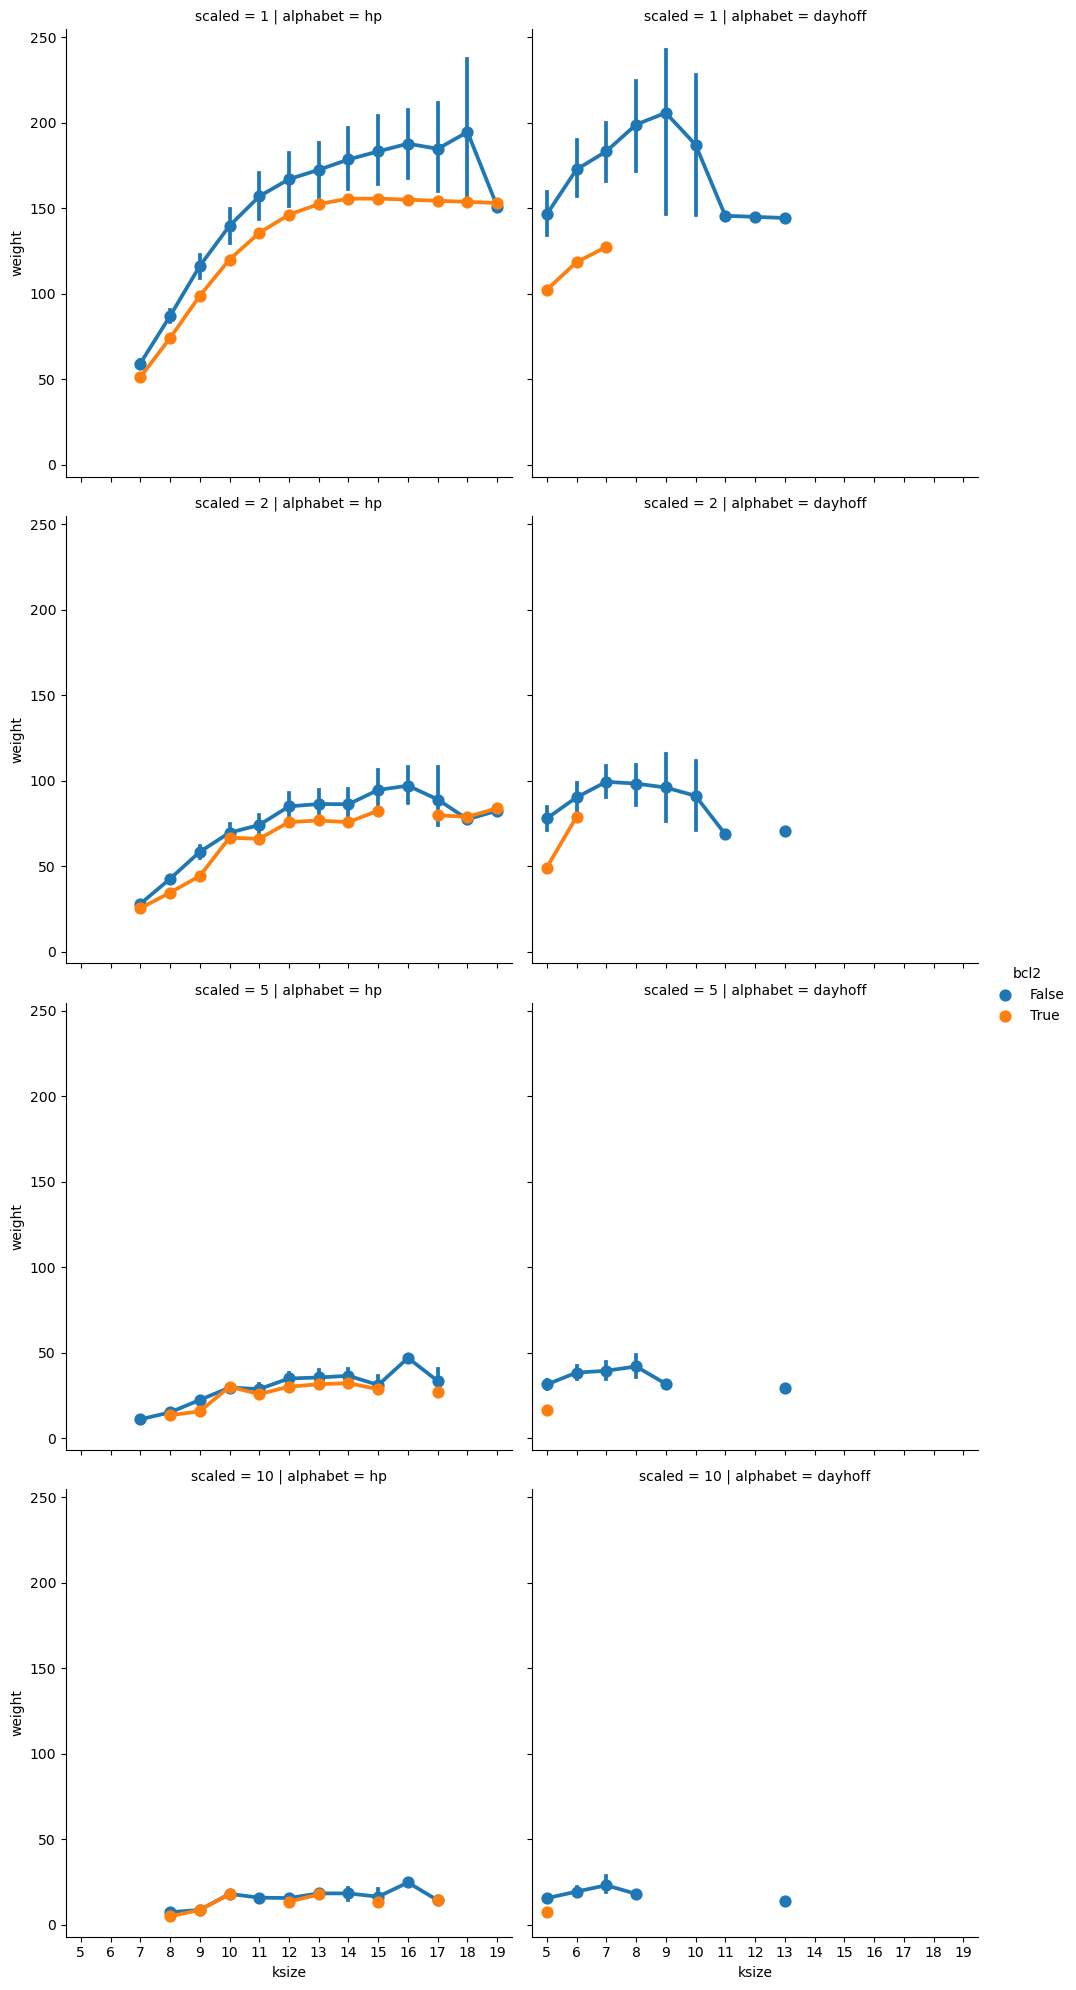

In [99]:
sns.catplot(data=ced9_principal, hue='bcl2', col='alphabet', x='ksize', y='weight', kind='point', row='scaled')

In [35]:
multisearch.columns

Index(['human_gene', 'c_elegans_gene', 'similarity', 'prob_overlap', 'weight',
       'alphabet', 'ksize', 'scaled', 'md5', 'filename', 'name',
       'query_filename', 'query_name', 'query_md5', 'ani'],
      dtype='object')

In [11]:
csv

'../multisearch-hp-k5-scaled1/Caenorhabditis_elegans.WBcel235.pep.ced.fa.b5e80726.csv'